In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### To pratice, we're going to build a meural network to classify images of different item of clothing

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each examples is a 28X28 grayscale image, associate with a label from 10 classes

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show the forst training examples
print(f'Training sample:\n{train_data[0]}\n')
print(f'Trainin label:\n {train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

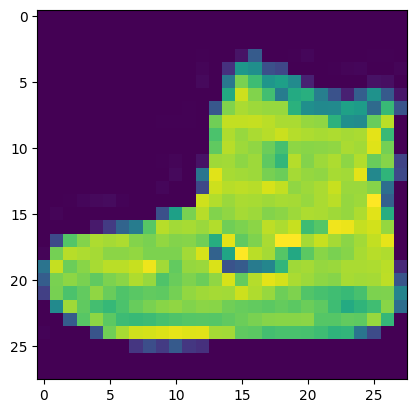

In [6]:
# plot a single sample
plt.imshow(train_data[0])

In [7]:
train_labels[0]

9

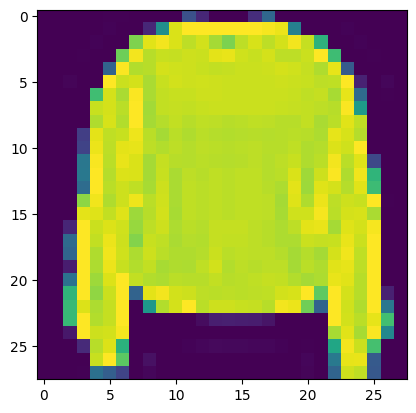

In [8]:
plt.imshow(train_data[7])

In [9]:
train_labels[7]

2

In [10]:
# create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Snakle boot']

len(class_names)

10

Text(0.5, 1.0, 'Sandal')

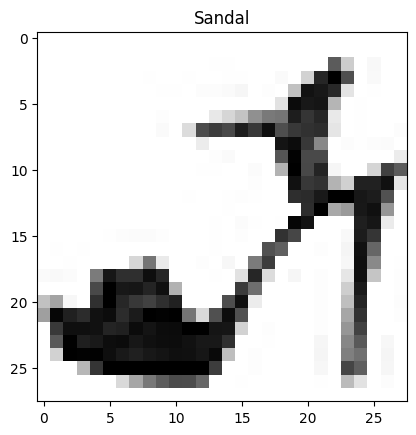

In [11]:
# Plot an example image and it's label
index_of_choice = 9
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

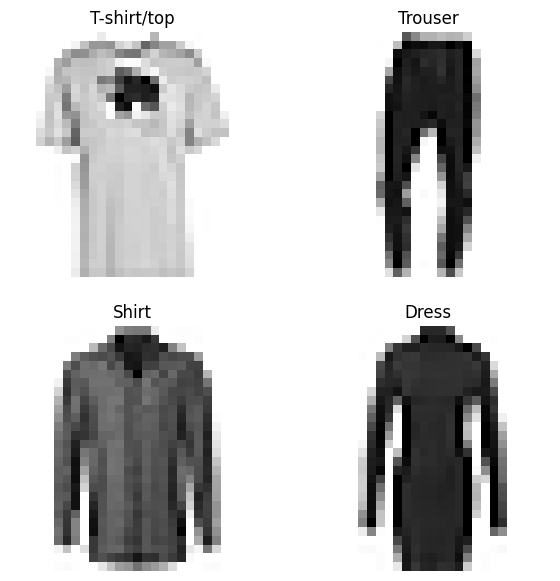

In [12]:
# plot multiple random imaages of fashionn MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary class classification, However, we're going to have to tweak a few things
* Input shape  =  28 X 28(the shape of one image)
*  Output shape = 10 (One per class of clothing)
*  Loss function = tf.keras.losses.CategoricalCrossentrophy()
   * If your labels are on-hot encoded, use CategoricalCrossentrophy()
   * if your labels are integer form ,use SparceCategoricalCrossentrophy()
*  Output layer activation = Softmax(not sigmoid)

In [13]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,))])
flatten_model.output_shape

(None, 784)

In [14]:
28*28

784

In [15]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
tf.one_hot(train_labels[:10], depth=10) # For CategoricalCrossentrophy()

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [17]:
# Set Random seed
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
non_norm_histroy = model_1.fit(train_data, 
                               tf.one_hot(train_labels, depth=10), 
                               epochs=10, 
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0116 - accuracy: 0.2152 - val_loss: 1.8068 - val_accuracy: 0.2617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6417 - accuracy: 0.3119 - val_loss: 1.4934 - val_accuracy: 0.3567
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3424 - accuracy: 0.4374 - val_loss: 1.3386 - val_accuracy: 0.3924
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2441 - accuracy: 0.4561 - val_loss: 1.2226 - val_accuracy: 0.4695
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2072 - accuracy: 0.4744 - val_loss: 1.1892 - val_accuracy: 0.4944
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1530 - accuracy: 0.5112 - val_loss: 1.1502 - val_accuracy: 0.5256
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1113 - accuracy: 0.5287 - val_loss: 1.1290 - val_accuracy:

In [18]:
# Check the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Check the mon and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scales (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [20]:
# We can get our training and testing data between 0 & 1 by dividing by thr maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [21]:
# Now our data is normalized, let's build a model to find patterns in it

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

norm_history = model_2.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9728 - accuracy: 0.6587 - val_loss: 0.7101 - val_accuracy: 0.7660
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6405 - accuracy: 0.7879 - val_loss: 0.6684 - val_accuracy: 0.7816
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5931 - accuracy: 0.8005 - val_loss: 0.6381 - val_accuracy: 0.7727
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5678 - accuracy: 0.8077 - val_loss: 0.5993 - val_accuracy: 0.7963
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5512 - accuracy: 0.8120 - val_loss: 0.6082 - val_accuracy: 0.7989
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5372 - accuracy: 0.8168 - val_loss: 0.5765 - val_accuracy: 0.8003
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5253 - accuracy: 0.8215 - val_loss: 0.5901 - val_accuracy:

🔑 **Note** Nueral Networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

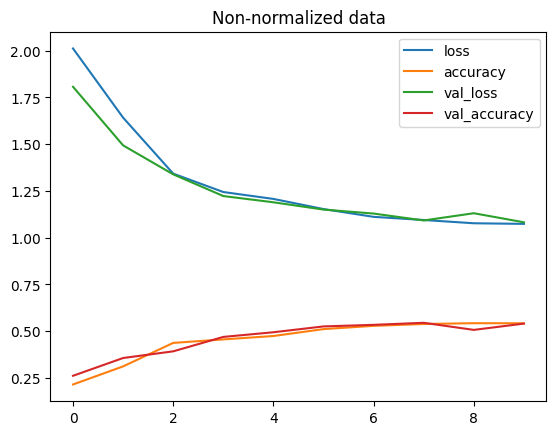

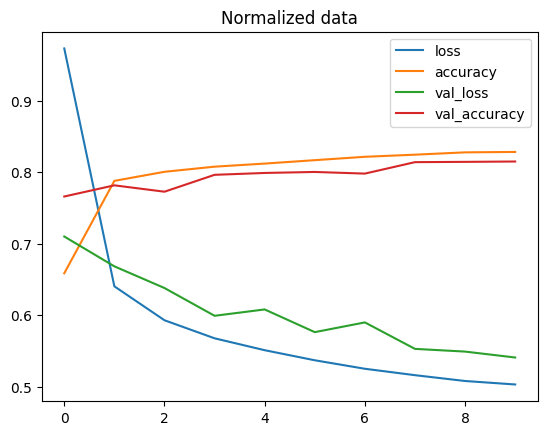

In [22]:
# plot non-normalized data loss curves
pd.DataFrame(non_norm_histroy.history).plot(title='Non-normalized data')
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models. it's important to make sure you're comparing them to the same criteria (e.g. same architecture but different data or same data but different architecture)

### Finding the ideal learning curve

In [23]:
# Now our data is normalized, let's build a model to find patterns in it

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

lr_scedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=[lr_scedular])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0940 - accuracy: 0.5586 - val_loss: 0.7636 - val_accuracy: 0.7034 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7034 - accuracy: 0.7316 - val_loss: 0.6899 - val_accuracy: 0.7420 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6437 - accuracy: 0.7609 - val_loss: 0.6596 - val_accuracy: 0.7650 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5961 - accuracy: 0.7897 - val_loss: 0.6087 - val_accuracy: 0.7905 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5716 - accuracy: 0.7995 - val_loss: 0.5991 - val_accuracy: 0.7977 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5584 - accuracy: 0.8044 - val_loss: 0.6142 - val_accuracy: 0.7922 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

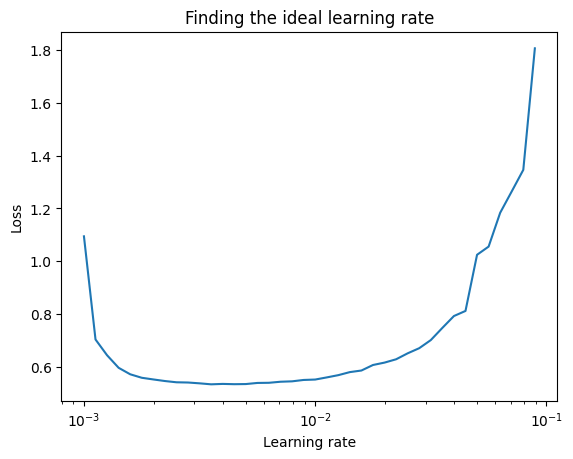

In [24]:
# plt the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [25]:
# Let's refit a model with ideal learning rate 

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_4 = model_4.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2258 - accuracy: 0.5630 - val_loss: 0.8894 - val_accuracy: 0.6710
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7738 - accuracy: 0.7235 - val_loss: 0.7357 - val_accuracy: 0.7570
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6412 - accuracy: 0.7809 - val_loss: 0.6391 - val_accuracy: 0.7776
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5849 - accuracy: 0.8008 - val_loss: 0.5941 - val_accuracy: 0.7939
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5549 - accuracy: 0.8085 - val_loss: 0.5865 - val_accuracy: 0.8013
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5355 - accuracy: 0.8145 - val_loss: 0.5823 - val_accuracy: 0.8054
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5251 - accuracy: 0.8166 - val_loss: 0.5942 - val_accuracy:

## Evaluatinf our multi-class classfication model

To evaluate our multi-class classification model we could:
* Evalute it's performance usinf other classification metrics (such as a confusion matrix)
* Assess some of its prediction (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [26]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create amtrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes 
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title = "Confusion Matrix",
          xlabel = " Predicted Label",
          ylabel = "Truw Label",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels=labels, # Axes will labeled with class name 
          yticklabels=labels)

    # Set X-axis lables to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # # Adjust label size
    # ax.yaxis.label.set_size(text_size)
    # ax.xaxis.label.set_size(test_size)
    # ax.title.set_size(text_size)
    
    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Snakle boot']

In [28]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [29]:
# Make some prediction with our model
y_probs = model_4.predict(test_data_norm) # probs is short for "prediction probabilities"

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.3002409e-03, 6.5739970e-03, 8.3721994e-04, 3.9509488e-03,
        7.9612609e-04, 1.5037733e-01, 6.5317331e-04, 9.6700780e-02,
        1.1333658e-02, 7.2747642e-01],
       [8.8819295e-05, 5.9898957e-07, 9.6926314e-01, 2.8095704e-08,
        8.0806511e-03, 1.0681525e-36, 2.1779051e-02, 0.0000000e+00,
        7.8769389e-04, 0.0000000e+00],
       [1.8426603e-06, 9.9977082e-01, 1.4169228e-04, 3.1329364e-05,
        5.1051898e-05, 5.1768364e-17, 8.9863846e-08, 4.0828963e-30,
        3.1353557e-06, 6.0339673e-08],
       [2.6574742e-07, 9.9998367e-01, 1.9369054e-06, 1.0045309e-05,
        2.4242127e-07, 2.2983539e-17, 7.3601192e-10, 6.8277818e-31,
        1.6628043e-08, 3.7441187e-06],
       [1.0333254e-01, 2.3212825e-04, 1.6533229e-01, 2.9853523e-02,
        4.8074592e-02, 2.0718158e-12, 6.5169102e-01, 0.0000000e+00,
        1.4838834e-03, 6.7296793e-24]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [30]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.3002409e-03, 6.5739970e-03, 8.3721994e-04, 3.9509488e-03,
        7.9612609e-04, 1.5037733e-01, 6.5317331e-04, 9.6700780e-02,
        1.1333658e-02, 7.2747642e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Snakle boot')

In [31]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[739,   1,  25,  76,   1,   3, 120,   0,  35,   0],
       [  2, 951,  11,  26,   5,   0,   0,   0,   3,   2],
       [ 12,   3, 670,  13, 185,   0,  85,   0,  32,   0],
       [ 56,  20,  32, 797,  36,   2,  46,   0,  10,   1],
       [  0,   3, 119,  15, 793,   1,  62,   0,   7,   0],
       [  0,   0,   0,   2,   0, 876,   0,  65,  15,  42],
       [131,   2, 135,  43, 156,   1, 469,   0,  62,   1],
       [  0,   0,   0,   0,   0,  17,   0, 941,   0,  42],
       [  8,   2,   8,   5,   5,   1,   7,   5, 959,   0],
       [  0,   1,   0,   2,   0,   9,   0,  43,   2, 943]], dtype=int64)

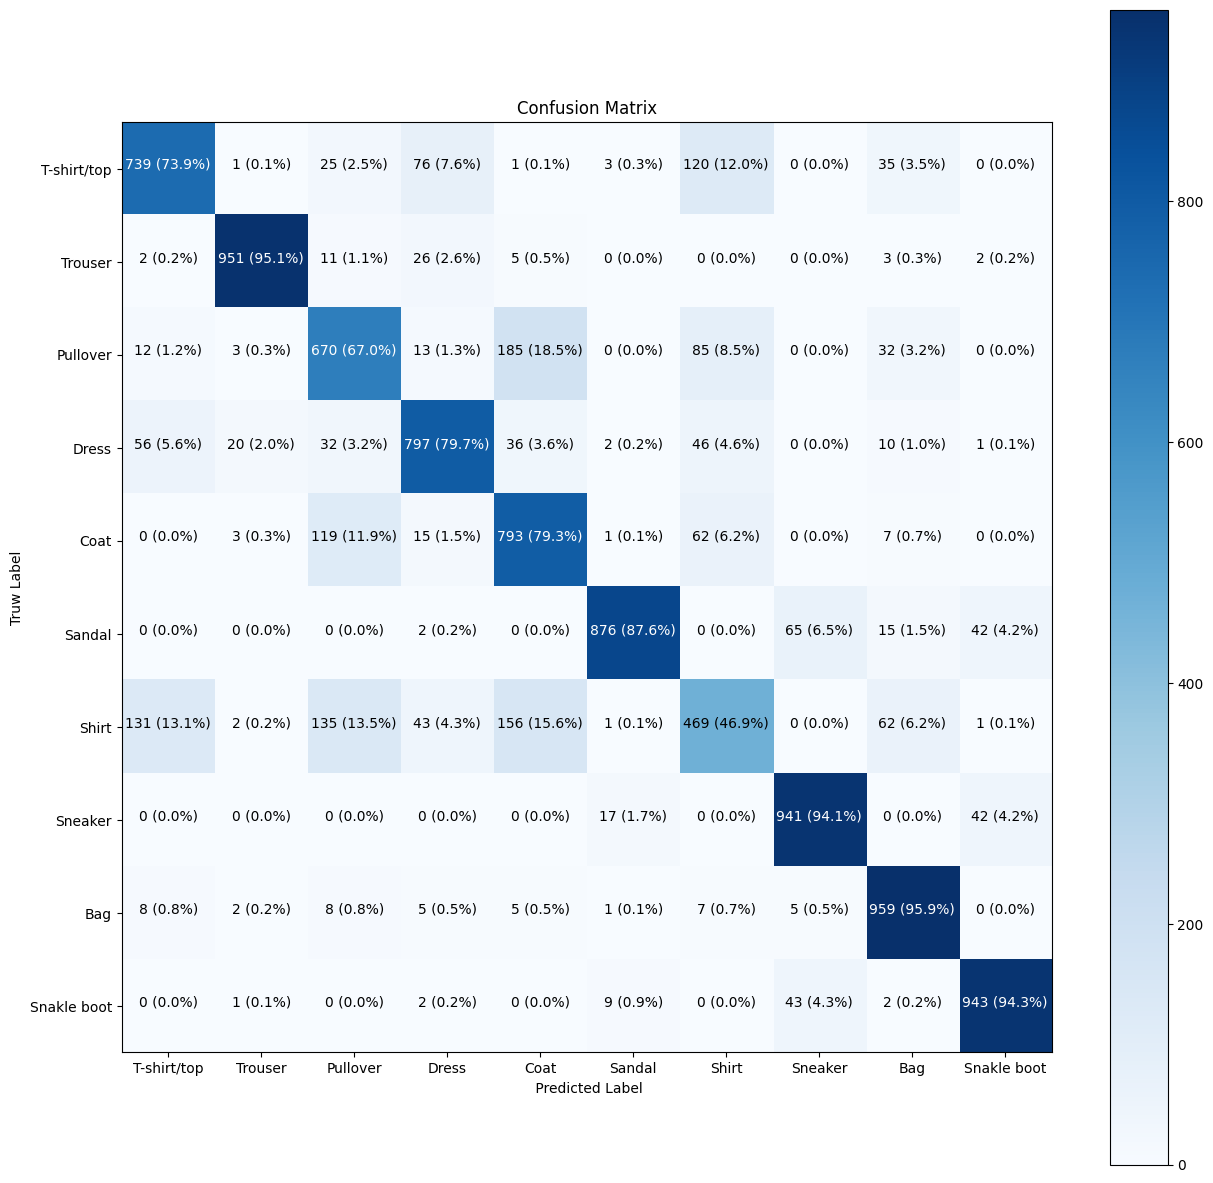

In [33]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                      classes=class_names,
                     figsize=(15, 15),
                     text_size=10)

🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and inputs and outputs of your models.

How about we create a fun little functiion for:
 * plot a random image
 * Make a prediction on said image
 * Label the plot with truth label & predicted label

In [34]:
import random
def plot_random_image(model, images, true_labels, classes):
    """
    picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predicitons and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    #plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    #Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # Set the color to green or red based on if the prediction is right or wrong

1/1 [==============================] - 0s 27ms/step


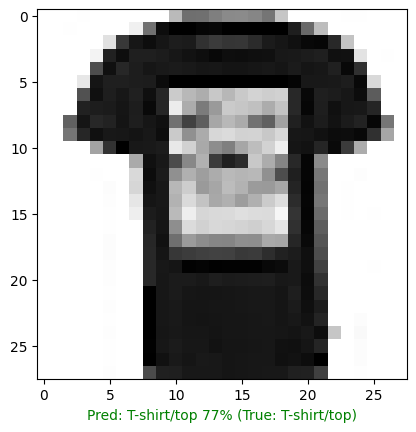

In [35]:
# Check out a random image as well as its prediction
plot_random_image(model = model_4,
                 images = test_data_norm,
                 true_labels = test_labels,
                 classes = class_names)

### What patterns is our model learning?

In [36]:
# Find the layers of our most recent model
model_4.layers

In [37]:
# Extract a particular layer
model_4.layers[1]

In [38]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

#shapes
weights, weights.shape

(array([[ 0.24619901,  0.5357619 , -0.80861765,  0.7781208 ],
        [ 0.22426535, -0.11777619, -0.5519176 ,  0.04317724],
        [ 0.24467964,  0.772522  , -0.85698056,  0.9590185 ],
        ...,
        [ 0.2093646 ,  0.49800563, -0.39070222, -0.15071814],
        [ 0.74027205,  0.43355232, -0.7915423 , -0.37726414],
        [ 0.6739962 , -0.0512814 , -0.5114565 ,  0.51924086]],
       dtype=float32),
 (784, 4))

In [39]:
biases, biases.shape

(array([0.38731503, 1.3065892 , 0.56248015, 1.1758322 ], dtype=float32), (4,))

- Every neuron has a bias vector. Each of these is paired witha weights matrix
- The bias vector get intialized as zeros (at least in the case of Tensorflow Dense layer).
- The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

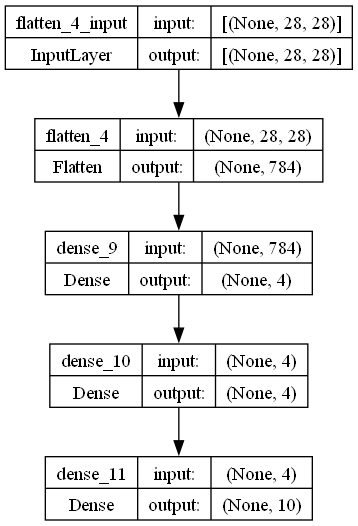

In [40]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)